In [2]:
import tifffile as tiff
a = tiff.imread('../data/us-wind-data/wtk_conus_40m_mean_masked.tif')
a.shape

(1426, 2472)

In [3]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
from osgeo import osr, ogr, gdal
import matplotlib.pyplot as plt
import numpy as np

In [39]:
dataset = gdal.Open(r'../data/us-wind-data/wtk_conus_40m_mean_masked.tif')
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001525DD8E0F0> >

In [6]:
print(dataset.RasterCount)

1


In [45]:
band1 = dataset.GetRasterBand(1)

In [46]:
b1 = band1.ReadAsArray() 
b1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [138]:
b1.getBounds()

AttributeError: 'numpy.ndarray' object has no attribute 'getBounds'

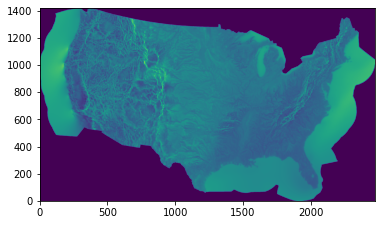

In [9]:
#img = np.dstack(b1) 
f = plt.figure() 
plt.imshow(b1, origin='lower') 
#plt.savefig('Tiff.png') 
plt.show() 

In [50]:
cols = dataset.RasterXSize
rows = dataset.RasterYSize

In [52]:
print(cols)
print(rows)

2472
1426


In [72]:
geo_matrix = dataset.GetGeoTransform()
geo_matrix

(-2577339.0, 2000.570792880259, 0.0, -1615898.0, 0.0, 2000.460729312763)

In [93]:
ul_x = geo_matrix[0]
ul_y = geo_matrix[3]
x_dist = geo_matrix[1]
y_dist = geo_matrix[5]
x = dataset.RasterXSize
y = dataset.RasterYSize

In [94]:
    _x = x* x_dist + ul_x
    _y = y*y_dist + ul_y

In [95]:
print(_x)
print(_y)

2368072.0
1236759.0


In [87]:
def pixel_to_world(geo_matrix, x, y):
    ul_x = geo_matrix[0]
    ul_y = geo_matrix[3]
    x_dist = geo_matrix[1]
    y_dist = geo_matrix[5]
    _x = x * x_dist + ul_x
    _y = y * y_dist + ul_y
    return _x, _y


def build_transform_inverse(dataset, EPSG):
    source = osr.SpatialReference(wkt=dataset.GetProjection())
    target = osr.SpatialReference()
    target.ImportFromEPSG(EPSG)
    return osr.CoordinateTransformation(source, target)


def find_spatial_coordinate_from_pixel(dataset, transform, x, y):
    world_x, world_y = pixel_to_world(dataset.GetGeoTransform(), x, y)
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(world_x, world_y)
    point.Transform(transform)
    return point.GetX(), point.GetY()

In [88]:
ds = gdal.Open('../data/us-wind-data/wtk_conus_40m_mean_masked.tif')
_t = build_transform_inverse(ds, 4326)
coordinates = find_spatial_coordinate_from_pixel(ds, _t, point[0], point[1]))
print(coordinates)

TypeError: unsupported operand type(s) for *: 'Geometry' and 'float'

In [79]:
point = ogr.Geometry(ogr.wkbPoint)
point

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x000001520412EF00> >

In [57]:
topLeftX = geoinformation[0]
topLeftY = geoinformation[3]

print('Top left X: ' + str(topLeftX))
print('Top left Y: ' + str(topLeftY))

Top left X:-2577339.0
Top left Y:-1615898.0


In [63]:
#first we access the projection information within our datafile using the GetProjection() method. This returns a string in WKT format"""

projInfo = dataset.GetProjection()

#Then we use the osr module that comes with GDAL to create a spatial reference object"""

spatialRef = osr.SpatialReference()

#We import our WKT string into spatialRef"""

spatialRef.ImportFromWkt(projInfo)

#We use the ExportToProj4() method to return a proj4 style spatial reference string."""

spatialRefProj = spatialRef.ExportToProj4()

#We can then print them out"""

print("WKT format: " + str(spatialRef))
print("Proj4 format: " + str(spatialRefProj))

WKT format: PROJCS["unnamed",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101004,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Lambert_Conformal_Conic_2SP"],
    PARAMETER["latitude_of_origin",40],
    PARAMETER["central_meridian",-96],
    PARAMETER["standard_parallel_1",20],
    PARAMETER["standard_parallel_2",60],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]
Proj4 format: +proj=lcc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs


In [146]:
ulx, xres, xskew, uly, yskew, yres  = dataset.GetGeoTransform()
lrx = ulx + (dataset.RasterXSize * xres)
lry = uly + (dataset.RasterYSize * yres)

In [153]:
from osgeo import ogr
from osgeo import osr

# Setup the source projection - you can also import from epsg, proj4...
source = osr.SpatialReference()
source.ImportFromWkt(dataset.GetProjection())

# The target projection
target = osr.SpatialReference()
target.ImportFromEPSG(4326)

# Create the transform - this can be used repeatedly
transform = osr.CoordinateTransformation(source, target)

# Transform the point. You can also create an ogr geometry and use the more generic `point.Transform()`
transform.TransformPoint(ulx, uly)

(21.23765060221556, -121.3588659906066, 0.0)

In [154]:
transform.TransformPoint(lrx, lry)

(47.35474494636588, -61.98021435919617, 0.0)

In [166]:
from affine import Affine

# E.g., from a GDAL DataSet object:
gt = dataset.GetGeoTransform()
ncol = dataset.RasterXSize
nrow = dataset.RasterYSize

transform = Affine.from_gdal(*gt)
print(transform)
# | 17.32, 5.00, 100.00|
# | 10.00,-8.66, 200.00|
# | 0.00, 0.00, 1.00|
#Now you can generate the four corner coordinate pairs:

c0x, c0y = transform.c, transform.f  # upper left
c1x, c1y = transform * (0, nrow)     # lower left
c2x, c2y = transform * (ncol, nrow)  # lower right
c3x, c3y = transform * (ncol, 0)     # upper right
#And if you also need the grid-based bounds (xmin, ymin, xmax, ymax):

xs = (c0x, c1x, c2x, c3x)
ys = (c0y, c1y, c2y, c3y)
bounds = min(xs), min(ys), max(xs), max(ys)
print(bounds)

| 2000.57, 0.00,-2577339.00|
| 0.00, 2000.46,-1615898.00|
| 0.00, 0.00, 1.00|
(-2577339.0, -1615898.0, 2368072.0, 1236759.0)


In [174]:
m = folium.Map([40, -96], zoom_start=3)

#folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[47.35474494636588, -61.98021435919617, 0], [21.23765060221556, -121.3588659906066, 0]],
    origin="lower",
    colormap= lambda x: (0, 0, 1, x),
    mercator_project=False,
).add_to(m)

m
#[[47.35474494636588, -61.98021435919617, 0], [21.23765060221556, -121.3588659906066, 0]],
#Unit: meters
#Geodetic: WGS84, EPSG: 4326
#Data resolution: 2km x 2km
#
#    #bounds=[[0, -60], [60, 60]],
#    
#data, opacity=0.25, min_lat=-90.0, max_lat=90.0, min_lon=-180.0, max_lon=180.0, origin='upper', colormap=None, image_name=None, filename=None, mercator_project=False)

In [15]:
import numpy as np
import folium

image = np.zeros((61, 61))
image[0, :] = 1.0
image[60, :] = 1.0
image[:, 0] = 1.0
image[:, 60] = 1.0

In [16]:
m = folium.Map([37, 0], zoom_start=2)

image = b1

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

In [17]:
#image = np.zeros((61, 1))

#image[45, :] = 1.0
image = b1


m = folium.Map([37, 0], zoom_start=3)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (0, 1, 0, x),
    origin="lower",
).add_to(m)

folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

m